**Experiment 7**

Name: Komal Chitnis

Class: BE-A

Moodle id: 20102068


In [4]:
#make directory

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
#download dataset from Kaggle

!kaggle datasets download -d salader/dogs-vs-cats


100% 1.06G/1.06G [00:12<00:00, 166MB/s]
100% 1.06G/1.06G [00:12<00:00, 94.2MB/s]


In [6]:
#To Unzip the dataset

import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization,Dropout


In [8]:
# generators divides the data into batches to increase the speed and use RAM effectively
# gererators are very useful to process large amount of data
# detailed documentation of generators https://keras.io/api/data_loading/image/
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',#path of Train folder
    labels='inferred',
    label_mode = 'int',#assign 0 for cat and 1 for dog
    batch_size=32,
    image_size=(256,256)#reshape images to 256*256*3
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',#path of Test folder
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
# Normalize to values from 0-255 to 0-1
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [10]:
# create CNN model
# CNN Architecture - 3 Convolutional Layers - in first layer 32 filters - in second layer 64 filters - and in third layer 128 filters
# Pooling layer for Dimensionality Reduction & Translation Invariance

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 73s 101ms/step - loss: 1.3091 - accuracy: 0.6030 - val_loss: 0.5937 - val_accuracy: 0.6832
Epoch 2/10
625/625 [==============================] - 64s 103ms/step - loss: 0.5593 - accuracy: 0.7103 - val_loss: 0.5221 - val_accuracy: 0.7396
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4783 - accuracy: 0.7719 - val_loss: 0.5312 - val_accuracy: 0.7566
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4500 - accuracy: 0.7940 - val_loss: 0.4458 - val_accuracy: 0.7888
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3673 - accuracy: 0.8328 - val_loss: 0.4700 - val_accuracy: 0.7832
Epoch 6/10
625/625 [==============================] - 68s 107ms/step - loss: 0.3015 - accuracy: 0.8702 - val_loss: 0.5196 - val_accuracy: 0.7814
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2267 - accuracy: 0.9040 - val_loss: 0.4850 - val_ac

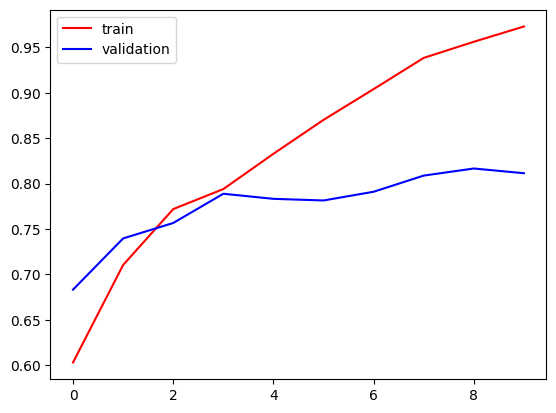

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()
#try to decrease the gap to reduce overfitting

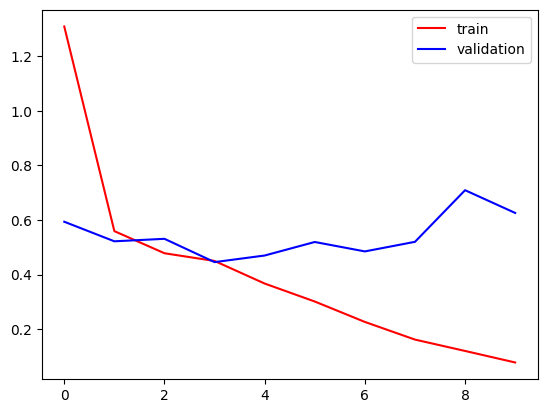

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()
#try to decrease the gap to reduce overfitting

In [16]:
import cv2
import matplotlib.pyplot as plt

In [17]:
test_img1 = cv2.imread('/content/Dog.jpg')

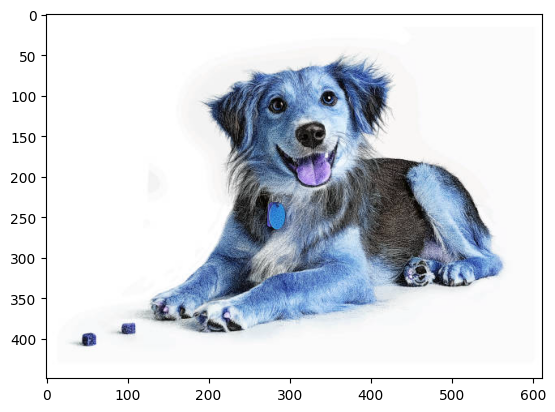

In [18]:
plt.imshow(test_img1)

In [19]:
test_img1.shape #actual shape of the image

(449, 612, 3)

In [20]:
test_img1 = cv2.resize(test_img1,(256,256))

In [21]:
test_input1 = test_img1.reshape((1,256,256,3)) #in this batch there is only one image

In [22]:
model.predict(test_input1) # classn 0 for Cat and 1 for Dog

1/1 [==============================] - 0s 407ms/step


array([[1.]], dtype=float32)

In [23]:
test_img2 = cv2.imread('/content/Cat.jpg')

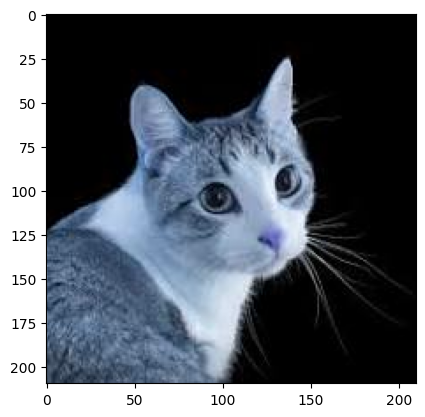

In [24]:
plt.imshow(test_img2)

In [25]:
test_img2.shape

(210, 210, 3)

In [26]:
test_img2 = cv2.resize(test_img2,(256,256))

In [27]:
test_input2 = test_img2.reshape((1,256,256,3))

In [28]:
model.predict(test_input2)

1/1 [==============================] - 0s 19ms/step


array([[0.]], dtype=float32)

In [29]:
test_img3 = cv2.imread('/content/Cat2.jpeg')

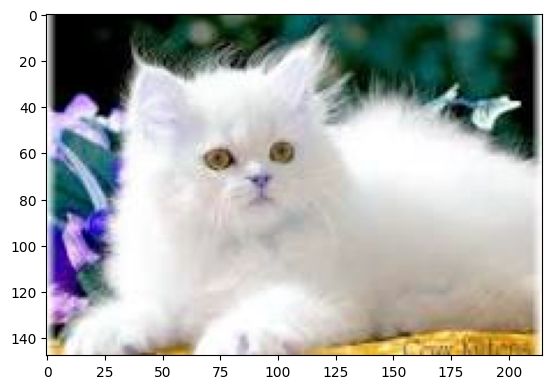

In [30]:
plt.imshow(test_img3)

In [31]:
test_img3.shape

(148, 215, 3)

In [32]:
test_img3 = cv2.resize(test_img3,(256,256))

In [33]:
test_input3 = test_img3.reshape((1,256,256,3))

In [34]:
model.predict(test_input3)

1/1 [==============================] - 0s 27ms/step


array([[0.]], dtype=float32)